In [1]:
# thư viện opencv
# pip install opencv-python
import cv2
from matplotlib import pyplot as plt
import numpy as np

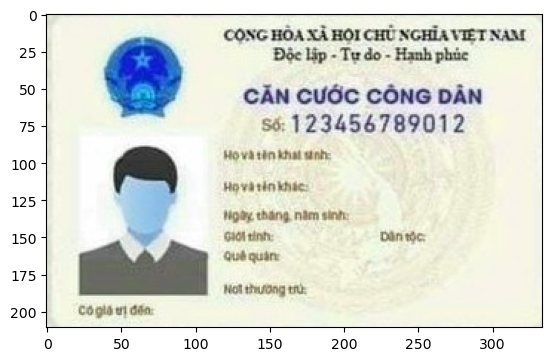

In [2]:
# đọc ảnh
#RGB red green blue -> BGR
img  = cv2.imread(r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\card\all_card\card (1).jpg")
plt.imshow(img)

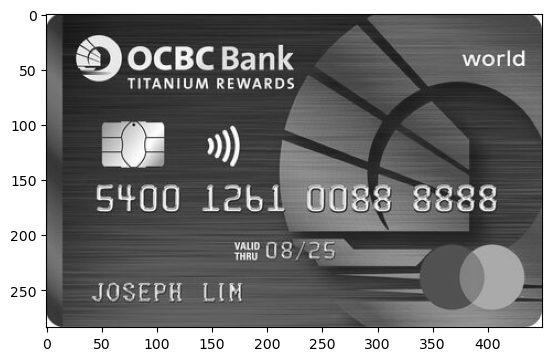

In [20]:
#convert BGR-> RGB
img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_new, cmap = 'gray')

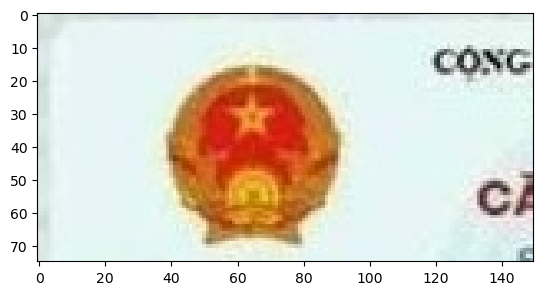

In [5]:
x1 = 0
y1 = 0
x2 = 150
y2 = 75
cropped = img_new[y1:y2, x1:x2]
plt.imshow(cropped)

In [6]:
cropped.shape

(75, 150, 3)

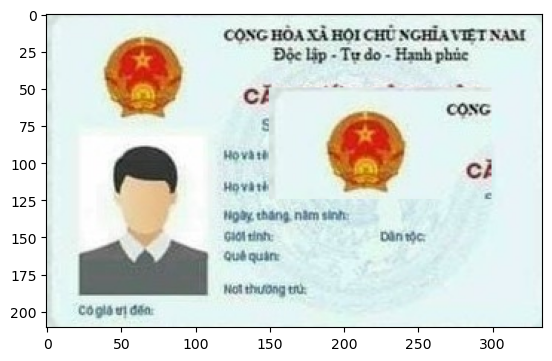

In [7]:
xx1 = 150
yy1 = 50

img_new[yy1:yy1+75, xx1:xx1+150] = cropped
plt.imshow(img_new)

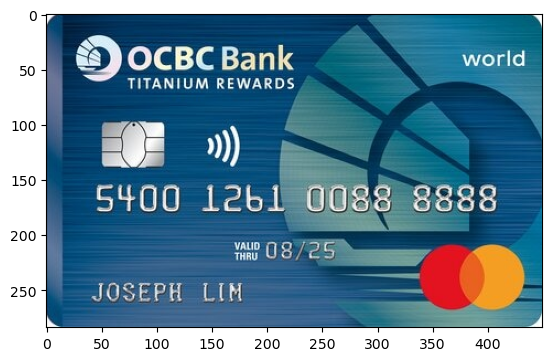

In [8]:
path = r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\card\all_card\card (5).jpeg"
img  = cv2.imread(path)
img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_new)

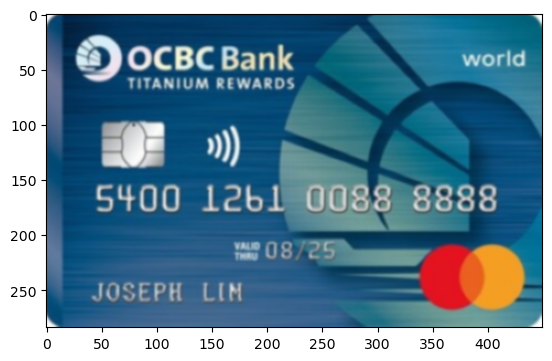

In [9]:
#làm mờ ảnh
blurred = cv2.GaussianBlur(img_new,(5,5),0)
plt.imshow(blurred)

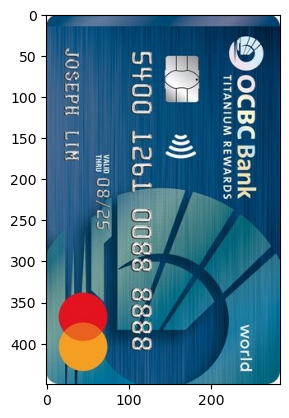

In [10]:
#xoay ảnh
rotate = cv2.rotate(img_new, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotate)

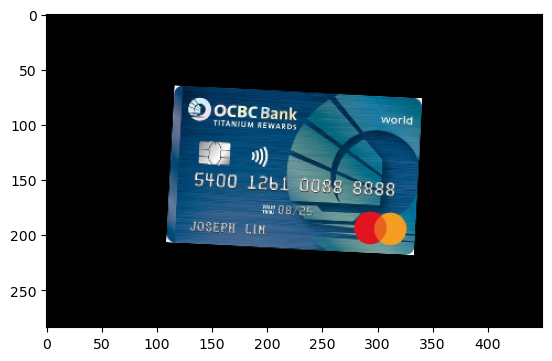

In [14]:
def rotate(image, angle, center = None, scale = 0.5):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

output = rotate(img_new, -3)
plt.imshow(output)

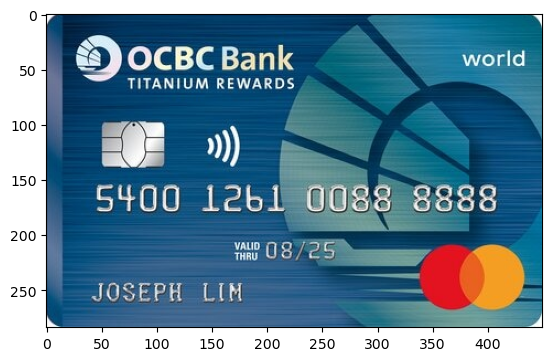

In [15]:
plt.imshow(img_new)

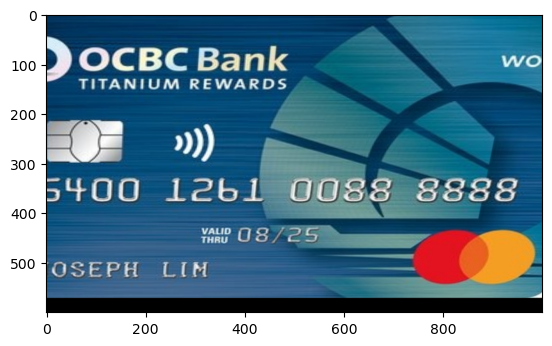

In [18]:
# rect = np.array([[50, 0],
#         [400, 0],
#         [450, 300],
#         [50, 300]])

# dst = np.array([
#         [0, 0],
#         [1000, 0],
#         [1000, 600],
#         [0, 600]], dtype = "float32")
rect = np.float32([[50, 0],
        [400, 0],
        [450, 300],
        [50, 300]])
dst = np.float32([[0, 0], [1000, 0], [1000, 600], [0, 600]])
M = cv2.getPerspectiveTransform(rect, dst)
warped = cv2.warpPerspective(img_new, M, (1000, 600))
warped = cv2.resize(warped, (1000, 600))
plt.imshow(warped)